In [4]:
import pandas as pd
import numpy as np
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO

In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/amberkakkar01/Prediction-of-Wine-Quality/master/winequality-red.csv')

In [7]:
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [8]:
df.shape

(1599, 12)

In [9]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1599.000000  1599.000000  1599.000000  1599.000000  
mean      3.311113     0.658149    10.422983     5.636023  
std       0.154386     0.169507     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [11]:
y = df.quality

In [13]:
X = df.drop(columns=['quality'])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 355)

In [16]:
dtcmodel = DecisionTreeClassifier()

In [17]:
dtcmodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
feature_name = list(X.columns)

In [23]:
class_name = list(y_train.unique())

In [25]:
dot_data = export_graphviz(dtcmodel,feature_names=feature_name, rounded=True, filled=True)

In [26]:
import pydotplus

In [28]:
graph = pydotplus.graph_from_dot_data(dot_data)

In [30]:
graph.write_png('mytreeimage.png')

True

In [31]:
from IPython.display import Image

In [32]:
Image(graph.create_png())

In [33]:
dtcmodel.score(X_train,y_train)

1.0

In [34]:
y_pred = dtcmodel.predict(X_test)

In [40]:
accuracy_score(y_test,y_pred)

0.6395833333333333

In [41]:
scaler = StandardScaler()

In [42]:
X_scaled = scaler.fit_transform(X)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.30, random_state = 355)

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA()

In [49]:
principalComponents = pca.fit_transform(X_scaled)

In [50]:
principalComponents

array([[-1.61952988,  0.45095009, -1.77445415, ...,  0.00509804,
        -0.26775943,  0.04863012],
       [-0.79916993,  1.85655306, -0.91169017, ..., -0.52070667,
         0.06283285, -0.13814189],
       [-0.74847909,  0.88203886, -1.17139423, ..., -0.08685693,
        -0.18744237, -0.11822866],
       ...,
       [-1.45612897,  0.31174559,  1.12423941, ..., -0.80877339,
         0.24224843, -0.40291033],
       [-2.27051793,  0.97979111,  0.62796456, ..., -0.61224806,
         0.77940384,  0.04092255],
       [-0.42697475, -0.53669021,  1.6289552 , ...,  0.40430898,
         0.77943963, -0.44978056]])

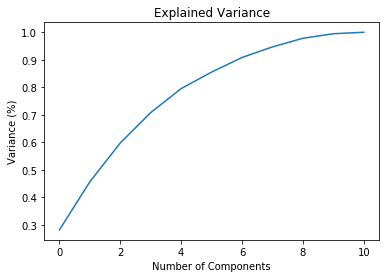

In [57]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [59]:
pca = PCA(n_components=8)

In [61]:
new_data = pca.fit_transform(X_scaled)

In [64]:
principal_x = pd.DataFrame(new_data, columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8'])

In [65]:
X_train, X_test, y_train , y_test = train_test_split(principal_x, y, test_size = 0.30, random_state = 355)

In [66]:
destcmodel = DecisionTreeClassifier()

In [67]:
destcmodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [68]:
destcmodel.score(X_train,y_train)

1.0

In [69]:
destcmodel.score(X_test,y_test)

0.5729166666666666

In [72]:
grid_search = GridSearchCV(estimator=destcmodel,param_grid=param_grid, cv= 5,n_jobs=-1)

In [70]:
param_grid = {
    'criterion':['gini', 'entropy'], 
    'max_depth':range(2,32,1),
    'min_samples_leaf':range(1,10,1),
    'min_samples_split':range(2,10,1),
    'splitter':['best', 'random']
    
}

In [73]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [75]:
best_parameters = grid_search.best_params_

In [76]:
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'}


In [77]:
grid_search.best_score_

0.5978379244074311

In [78]:
dtfff = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=25,min_samples_leaf=1,min_impurity_split=3)

In [79]:
dtfff.fit(X_train,y_train)

C:\Users\skme2\anaconda3\lib\site-packages\sklearn\tree\_classes.py:297: FutureWarning: The min_impurity_split parameter is deprecated. Its default value will change from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=25, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=3,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [80]:
dtfff.score(X_test,y_test)

0.44375

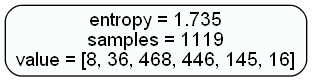

In [94]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
dot_data = export_graphviz(dtfff, rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [95]:
import pickle

In [96]:
with open('decisiontreee_model_forprediction.sav', "wb") as f:
    pickle.dump(dtfff,f)
    
with open('this_isscalar_model.pickle', "wb") as f:
    pickle.dump(scaler, f)
    
with open('pca_model_forprediction.sav', 'wb') as f:
    pickle.dump(pca, f)